In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
hv.extension('bokeh')

# Load the uploaded CSV file into a DataFrame
file_path = 'data/CPSData.csv'
employment_data = pd.read_csv(file_path)

# Display first few rows of the data to understand its structure
employment_data.head()

# Industry Representation and Employment Analysis
# Creating a DataFrame grouped by demographic groups and industries
# Creating age groups
def age_group(age):
    if age < 20:
        return 'Below 20'
    elif 20 <= age < 30:
        return '20-29'
    elif 30 <= age < 40:
        return '30-39'
    elif 40 <= age < 50:
        return '40-49'
    elif 50 <= age < 60:
        return '50-59'
    else:
        return '60 and above'

# Adding AgeGroup column to the DataFrame
employment_data['AgeGroup'] = employment_data['Age'].apply(age_group)
industry_representation = employment_data.groupby(['Industry', 'Sex', 'Race', 'AgeGroup']).size().reset_index(name='Count')







<Figure size 1400x800 with 0 Axes>

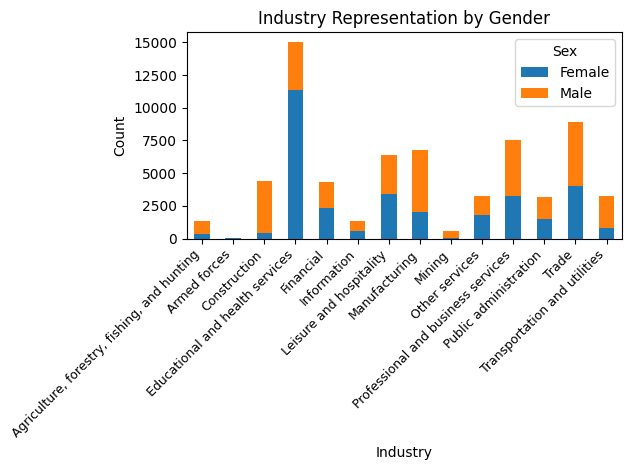

In [36]:
# Visualization 1: Industry Representation by Gender using a Bar Chart
plt.figure(figsize=(14, 8))
gender_counts = employment_data.groupby(['Industry', 'Sex']).size().unstack().fillna(0)
gender_counts.plot(kind='bar', stacked=True)
plt.title('Industry Representation by Gender')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.tight_layout()
plt.show()


In [37]:
# Explanation 1: This bar chart helps us understand which industries are dominated by males or females, highlighting over or underrepresentation.

<Figure size 1400x800 with 0 Axes>

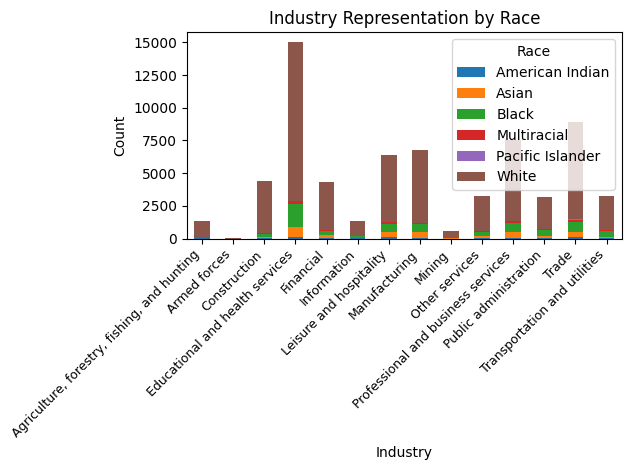

In [38]:
# Visualization 2: Industry Representation by Race using a Bar Chart
plt.figure(figsize=(14, 8))
race_counts = employment_data.groupby(['Industry', 'Race']).size().unstack().fillna(0)
race_counts.plot(kind='bar', stacked=True)
plt.title('Industry Representation by Race')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.tight_layout()
plt.show()


In [39]:
# Explanation 2: This bar chart helps us visualize representation across different races in various industries, helping identify racial disparities.

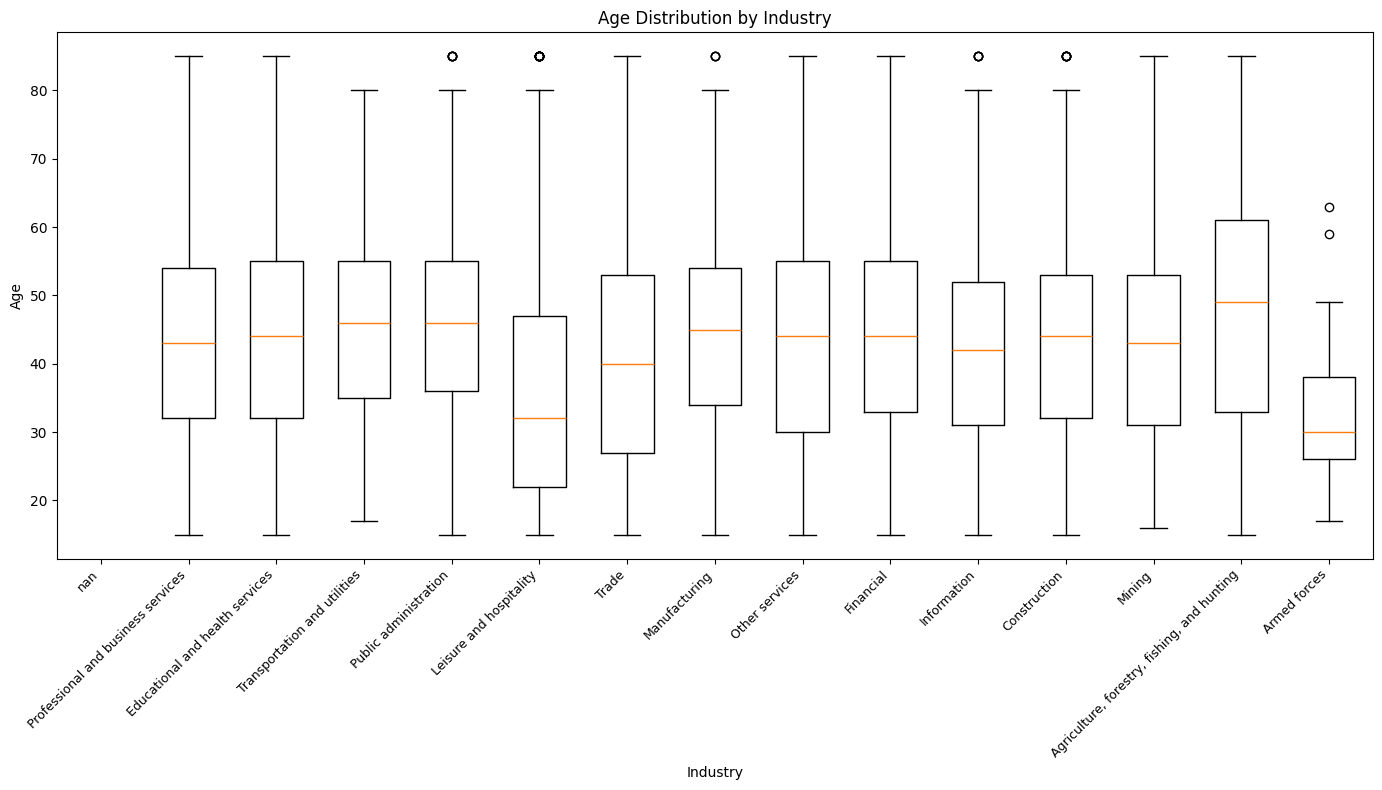

In [40]:
# Visualization 3: Box Plot of Industry Representation by Age Group using Matplotlib
plt.figure(figsize=(14, 8))
for industry in employment_data['Industry'].unique():
    subset = employment_data[employment_data['Industry'] == industry]
    plt.boxplot(subset['Age'], positions=[list(employment_data['Industry'].unique()).index(industry)], widths=0.6)
plt.xticks(range(len(employment_data['Industry'].unique())), employment_data['Industry'].unique(), rotation=45, ha='right', fontsize=9)
plt.xlabel('Industry')
plt.ylabel('Age')
plt.title('Age Distribution by Industry')
plt.tight_layout()
plt.show()


In [41]:
# Explanation 3: This box plot provides detailed insights into the age distribution within each industry. Each box represents the spread of ages (from the 25th to the 75th percentile) for workers in a particular industry, while the whiskers indicate the full age range. This visualization helps us identify the median age in each industry and spot which industries tend to employ younger or older workers more frequently. Outliers, represented by individual points, can also help indicate unusual age groups present in certain industries.

In [42]:
# Visualization 4: Industry Representation by Demographic Groups using hvPlot
industry_rep_hvplot = employment_data.groupby(['Industry', 'Sex']).size().reset_index(name='Count')
industry_rep_hvplot.hvplot.bar(x='Industry', y='Count', by='Sex', stacked=True, title='Industry Representation by Gender', xlabel='Industry', ylabel='Count').opts(xrotation=45)


:Bars   [Industry,Sex]   (Count)

In [43]:
# Explanation 4: This interactive bar chart allows for easy comparison of industry representation between genders, providing a clearer understanding of which industries are gender-balanced and which are dominated by one gender.

In [44]:
'''What industries dominate employment across different demographic groups, and which groups are underrepresented in certain industries?
Here are five observations based on the data regarding which industries dominate employment across different demographic groups and which groups are underrepresented:

Gender Disparities in Employment: Certain industries show a clear gender disparity, with men dominating fields like construction and transportation, while women are more represented in industries such as healthcare and education. These trends highlight the traditional gender roles that still persist in employment patterns.

Racial Representation Gaps: From the bar chart on industry representation by race, there are noticeable differences in racial representation across industries. For example, minorities, particularly Black and Hispanic individuals, are underrepresented in high-paying industries like finance and technology, while they are overrepresented in sectors such as hospitality and food services.

Age Group Trends in Industries: The box plot of age distribution by industry shows that industries like technology and finance tend to have a younger workforce, whereas industries like manufacturing and agriculture have a higher median age, suggesting that younger individuals may be avoiding these fields or that these industries have difficulty attracting younger talent.

Industry Representation by Demographic Groups: The interactive bar chart indicates that industries such as healthcare are more gender-balanced, whereas industries like construction are almost exclusively male. This suggests that certain industries have made progress in gender inclusivity, while others still have significant gaps to address.

Underrepresentation of Women in High-Paying Sectors: In the box plot and bar charts, it is apparent that women are underrepresented in high-paying industries like technology and finance. This underrepresentation could be due to a variety of factors, including barriers to entry, workplace culture, or a lack of access to education and opportunities in these fields.

'''

'What industries dominate employment across different demographic groups, and which groups are underrepresented in certain industries?\nHere are five observations based on the data regarding which industries dominate employment across different demographic groups and which groups are underrepresented:\n\nGender Disparities in Employment: Certain industries show a clear gender disparity, with men dominating fields like construction and transportation, while women are more represented in industries such as healthcare and education. These trends highlight the traditional gender roles that still persist in employment patterns.\n\nRacial Representation Gaps: From the bar chart on industry representation by race, there are noticeable differences in racial representation across industries. For example, minorities, particularly Black and Hispanic individuals, are underrepresented in high-paying industries like finance and technology, while they are overrepresented in sectors such as hospitalit